Enter edge (u, v)
[PRESS ENTER TO STOP]


 A B
 A C
 A D
 B E
 C E
 C F
 D F
 E G
 F G
 
Enter source, goal:  A G


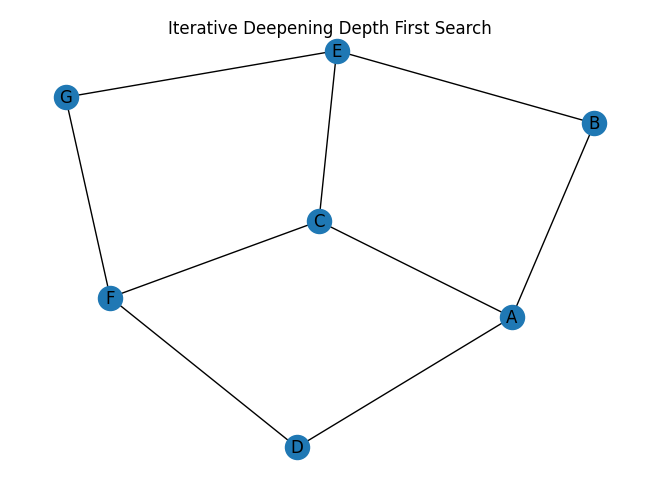

{'A': {'D', 'B', 'C'}, 'B': {'A', 'E'}, 'C': {'A', 'F', 'E'}, 'D': {'A', 'F'}, 'E': {'B', 'G', 'C'}, 'F': {'D', 'C', 'G'}, 'G': {'F', 'E'}}
Result(IDS/IDDFS A to G): cutoff at depth limit = 0
Result(IDS/IDDFS A to G): cutoff at depth limit = 1
Result(IDS/IDDFS A to G): cutoff at depth limit = 2
Result(IDS/IDDFS A to G): ['A', 'D', 'F', 'G'] at depth limit = 3


<Figure size 640x480 with 0 Axes>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
def display(graph, directed = False):
    g = nx.DiGraph(graph) if directed else nx.Graph(graph)
    nx.draw(g, with_labels = True)
    plt.suptitle("Iterative Deepening Depth First Search")
    plt.show()
    plt.clf()
def print_path(node, parent):
    if node != None:
        return print_path(parent[node], parent) + [node]
    return []
def IDS(graph, start, goal):
    depth = 0
    while True:
        result = recursive_dls(graph, start, goal, depth, [start])
        print(f"Result(IDS/IDDFS {start} to {goal}):",result,"at depth limit =",depth)
        if result != 'cutoff':
            return
        depth += 1
def recursive_dls(graph, node, goal, limit, visited):
    if node == goal:
        return [node]
    elif limit == 0:
        return 'cutoff'
    else:
        status = 'failure'
        for adj in graph[node]:
            if adj not in visited:
                visited.append(adj)
                result = recursive_dls(graph, adj, goal, limit - 1, visited)
                if result == 'cutoff':
                    status = 'cutoff'
                    visited.remove(adj)
                elif result != 'failure':
                    return [node] + result
        return status
def get_graph(directed = False):
    graph = {}
    print("Enter edge (u, v)")
    print("[PRESS ENTER TO STOP]")
    x = input()
    while x:
        x = x.split(maxsplit = 1)
        u, adj = x[0], {v.strip() for v in x[1].strip(' []').split(',') if v}
        graph[u] = graph.get(u,set()) | adj
        for v in adj:
            graph[v] = graph.get(v,set()) | ({u} if not directed else set())
        x = input()
    return graph
def example():
    graph = {"A" : ["B","C","D"],
             "B" : ["A","E"],
             "C" : ["A","E","F"],
             "D" : ["A","F"],
             "E" : ["B","G","C"],
             "F" : ["D","C","G"],
             "G" : ["E","F"]}
    display(graph)
    print(graph)
    IDS(graph, "A", "F", 3)

def main():
    #example();return #Uncomment to run the example
    graph = get_graph(directed = False)#undirected graph
    source, goal = input("Enter source, goal: ").split() 
    display(graph, directed = False)
    print(graph)
    IDS(graph, source, goal)

    #Sample output
    #Enter edge (u, v)
    #[PRESS ENTER TO STOP]
    #A B
    #A C
    #A D
    #B E
    #C E
    #C F
    #D F
    #E G
    #F G
 
    #Enter source, goal:  A G
    #Result(IDS/IDDFS): cutoff at depth limit = 0
    #Result(IDS/IDDFS): cutoff at depth limit = 1
    #Result(IDS/IDDFS): cutoff at depth limit = 2
    #Result(IDS/IDDFS): ['A', 'D', 'F', 'G'] at depth limit = 3
main()